In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(r"data\train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Train Test Split

**Determining a good categorical attribute for stratified sampling**

In [5]:
import seaborn as sns

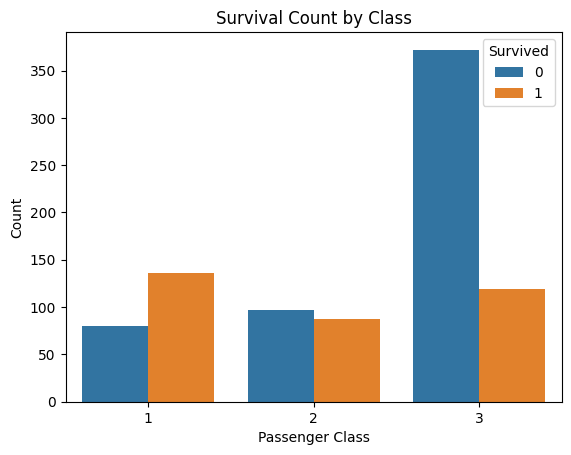

In [6]:
import matplotlib.pyplot as plt

sns.countplot(data= data, x="Pclass", hue="Survived")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Survival Count by Class")
plt.show()

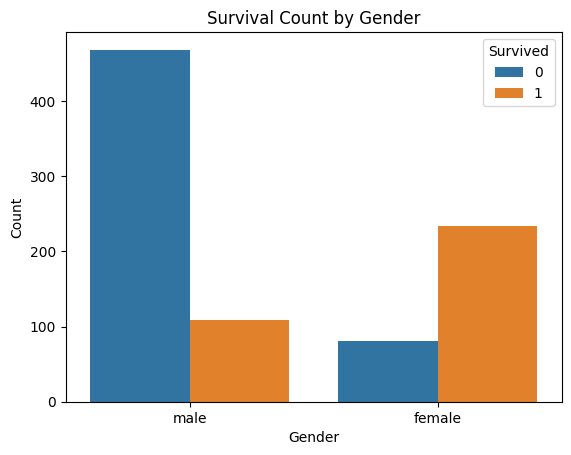

In [7]:
sns.countplot(data= data, x = "Sex", hue = "Survived")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Survival Count by Gender")
plt.show()

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

In [9]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

In [10]:
for train_index, test_index in split.split(data, data["Sex"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [11]:
strat_test_set["Sex"].value_counts()/len(strat_test_set)

Sex
male      0.648045
female    0.351955
Name: count, dtype: float64

In [12]:
data["Sex"].value_counts()/len(data)

Sex
male      0.647587
female    0.352413
Name: count, dtype: float64

In [13]:
strat_train_set["Sex"].value_counts()/len(strat_train_set)

Sex
male      0.647472
female    0.352528
Name: count, dtype: float64

In [14]:
titanic = strat_train_set.drop("Survived", axis = 1)

In [15]:
titanic_labels = strat_train_set["Survived"].copy()

# EDA

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 788 to 261
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          578 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        164 non-null    object 
 10  Embarked     710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [17]:
titanic.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            134
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          548
Embarked         2
dtype: int64

In [18]:
titanic["Cabin"].value_counts()

Cabin
C23 C25 C27    4
G6             3
B28            2
B96 B98        2
E8             2
              ..
E44            1
B69            1
A23            1
E58            1
B94            1
Name: count, Length: 128, dtype: int64

In [19]:
titanic.drop("Cabin", axis = 1, inplace = True)

In [20]:
titanic["Embarked"].value_counts()

Embarked
S    515
C    132
Q     63
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

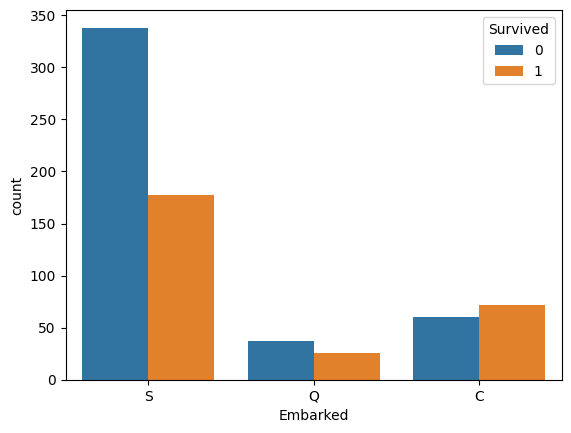

In [21]:
sns.countplot(data = titanic, x = "Embarked", hue = titanic_labels)

In [22]:
titanic_labels.value_counts()

Survived
0    435
1    277
Name: count, dtype: int64

In [23]:
titanic["Relatives_count"] = titanic["SibSp"] + titanic["Parch"]

In [24]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relatives_count
788,789,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,S,3
347,348,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,S,1
629,630,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,Q,0
734,735,2,"Troupiansky, Mr. Moses Aaron",male,23.0,0,0,233639,13.0000,S,0
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,S,0


In [25]:
titanic.drop(["SibSp", "Parch"], axis = 1, inplace = True)

In [26]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Relatives_count
788,789,3,"Dean, Master. Bertram Vere",male,1.0,C.A. 2315,20.5750,S,3
347,348,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,386525,16.1000,S,1
629,630,3,"O'Connell, Mr. Patrick D",male,NaN,334912,7.7333,Q,0
734,735,2,"Troupiansky, Mr. Moses Aaron",male,23.0,233639,13.0000,S,0
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,343120,7.6500,S,0


In [27]:
titanic.drop(["Name", "Ticket", "Fare", "PassengerId"], axis = 1, inplace = True)

In [28]:
titanic.head()

,Pclass,Sex,Age,Embarked,Relatives_count
788,3,male,1.0,S,3
347,3,female,NaN,S,1
629,3,male,NaN,Q,0
734,2,male,23.0,S,0
106,3,female,21.0,S,0


# Handling Missing values

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
imputer_num = SimpleImputer(strategy = "median")

In [31]:
titanic_num = titanic.drop(["Sex", "Embarked"], axis = 1)

In [32]:
X_impute_num = imputer_num.fit_transform(titanic_num)

In [33]:
titanic_num_tr = pd.DataFrame(X_impute_num, columns = titanic_num.columns, index = titanic_num.index)

In [34]:
titanic_num_tr.head()

,Pclass,Age,Relatives_count
788,3.0,1.0,3.0
347,3.0,28.0,1.0
629,3.0,28.0,0.0
734,2.0,23.0,0.0
106,3.0,21.0,0.0


In [35]:
imputer_cat = SimpleImputer(strategy = "most_frequent")

In [36]:
titanic_cat = titanic.loc[:,["Sex", "Embarked"]]

In [37]:
titanic_cat

,Sex,Embarked
788,male,S
347,female,S
629,male,Q
734,male,S
106,female,S
...,...,...
263,male,S
628,male,S
711,male,S
453,male,C


In [38]:
X_impute_cat = imputer_cat.fit_transform(titanic_cat)

In [39]:
titanic_cat_tr = pd.DataFrame(X_impute_cat, columns = titanic_cat.columns, index = titanic_cat.index)

In [40]:
titanic_cat_tr["Embarked"].isna().sum()

np.int64(0)

In [41]:
titanic_tr = pd.concat([titanic_num_tr, titanic_cat_tr], axis = 1)

In [42]:
titanic_tr.head()

,Pclass,Age,Relatives_count,Sex,Embarked
788,3.0,1.0,3.0,male,S
347,3.0,28.0,1.0,female,S
629,3.0,28.0,0.0,male,Q
734,2.0,23.0,0.0,male,S
106,3.0,21.0,0.0,female,S


In [43]:
titanic_tr.reset_index(drop = True, inplace = True)

In [44]:
titanic_tr.head()

,Pclass,Age,Relatives_count,Sex,Embarked
0,3.0,1.0,3.0,male,S
1,3.0,28.0,1.0,female,S
2,3.0,28.0,0.0,male,Q
3,2.0,23.0,0.0,male,S
4,3.0,21.0,0.0,female,S


# Handling Categorical Variable

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
encoder = OneHotEncoder(drop = "first")

In [47]:
titanic_cat = titanic_tr.loc[:,["Sex", "Embarked"]]

In [48]:
X_enc = encoder.fit_transform(titanic_cat)

In [49]:
X_enc = X_enc.toarray()

In [50]:
encoder.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [51]:
encoder.get_feature_names_out()

array(['Sex_male', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [52]:
titanic_cat_tr = pd.DataFrame(X_enc, columns = encoder.get_feature_names_out(), index = titanic_cat.index)

In [53]:
titanic_cat_tr.head()

,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,1.0,0.0
3,1.0,0.0,1.0
4,0.0,0.0,1.0


In [54]:
titanic_final = pd.concat([titanic_tr, titanic_cat_tr], axis = 1)

In [55]:
titanic_final.drop(["Sex", "Embarked"], axis = 1, inplace = True)

In [56]:
titanic_final.head()

,Pclass,Age,Relatives_count,Sex_male,Embarked_Q,Embarked_S
0,3.0,1.0,3.0,1.0,0.0,1.0
1,3.0,28.0,1.0,0.0,0.0,1.0
2,3.0,28.0,0.0,1.0,1.0,0.0
3,2.0,23.0,0.0,1.0,0.0,1.0
4,3.0,21.0,0.0,0.0,0.0,1.0


In [57]:
titanic_final.shape

(712, 6)

In [58]:
titanic_labels.shape

(712,)

In [59]:
titanic_final = titanic_final.astype(int)


In [60]:
titanic_final.head()

,Pclass,Age,Relatives_count,Sex_male,Embarked_Q,Embarked_S
0,3,1,3,1,0,1
1,3,28,1,0,0,1
2,3,28,0,1,1,0
3,2,23,0,1,0,1
4,3,21,0,0,0,1


# Scaling the Numerical Data

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scale = StandardScaler()

In [63]:
titanic_sc = titanic_final[["Age", "Relatives_count"]]

In [64]:
titanic_scaled = scale.fit_transform(titanic_sc)

In [65]:
titanic_scaled_df = pd.DataFrame(titanic_scaled, columns = titanic_sc.columns)

In [66]:
titanic_scaled_df.head()

,Age,Relatives_count
0,-2.154869,1.285409
1,-0.108372,0.049472
2,-0.108372,-0.568496
3,-0.487353,-0.568496
4,-0.638945,-0.568496


In [67]:
titanic_f = pd.concat([titanic_final.drop(["Age", "Relatives_count"], axis = 1), titanic_scaled_df], axis = 1)

In [68]:
titanic_f.head()

,Pclass,Sex_male,Embarked_Q,Embarked_S,Age,Relatives_count
0,3,1,0,1,-2.154869,1.285409
1,3,0,0,1,-0.108372,0.049472
2,3,1,1,0,-0.108372,-0.568496
3,2,1,0,1,-0.487353,-0.568496
4,3,0,0,1,-0.638945,-0.568496


# Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
reg = RandomForestClassifier()

In [71]:
reg.fit(titanic_f, titanic_labels)

RandomForestClassifier()

## Accuracy Metrics

In [72]:
# Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
cv_score = cross_val_score(reg, titanic_f, titanic_labels, cv = 5, scoring = "accuracy")

In [75]:
cv_score.mean()

np.float64(0.7851373978134542)

In [76]:
from sklearn.model_selection import cross_val_predict

In [77]:
y_pred_reg = cross_val_predict(reg, titanic_f, titanic_labels, cv = 5)

In [78]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [79]:
confusion_matrix(titanic_labels, y_pred_reg)

array([[372,  63],
       [ 87, 190]])

In [80]:
precision_score(titanic_labels, y_pred_reg)

0.7509881422924901

In [81]:
recall_score(titanic_labels, y_pred_reg)

0.6859205776173285

In [82]:
from sklearn.metrics import roc_curve

In [83]:
fpr, tpr, thresholds = roc_curve(titanic_labels, y_pred_reg)

In [84]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Random Classifier
    plt.xlabel("FPR")
    plt.ylabel("TPR")

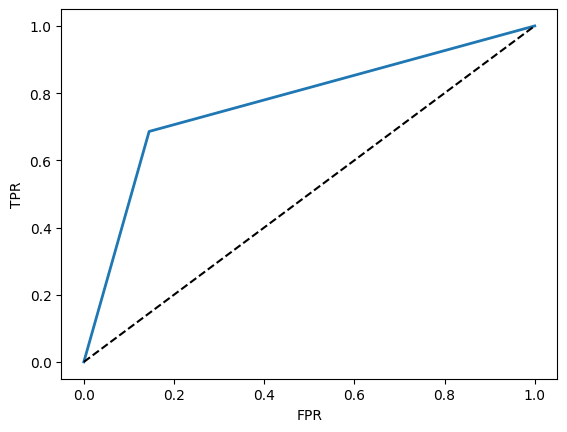

In [85]:
plot_roc_curve(fpr, tpr, "ROC Curve for RandomForestRegressor")
plt.show()

# Stochastic Gradient Descent

In [86]:
from sklearn.linear_model import SGDClassifier

In [87]:
sgd = SGDClassifier(random_state = 42)

In [88]:
sgd.fit(titanic_f, titanic_labels)

SGDClassifier(random_state=42)

## Accuracy Metrics

In [89]:
cv_score_sgd = cross_val_score(sgd, titanic_f, titanic_labels, cv = 5, scoring = "accuracy")

In [90]:
cv_score_sgd.mean()

np.float64(0.7682852358908697)

In [91]:
y_pred_sgd = cross_val_predict(sgd, titanic_f, titanic_labels, cv = 5)

In [92]:
precision_score(titanic_labels, y_pred_sgd)

0.7258064516129032

In [93]:
recall_score(titanic_labels, y_pred_sgd)

0.6498194945848376

In [94]:
fpr_sgd, tpr_sgd, threshold_sgd = roc_curve(titanic_labels, y_pred_sgd)

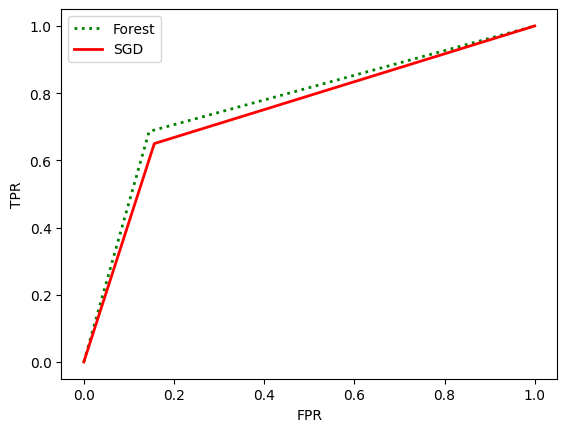

In [95]:
plt.plot(fpr, tpr, "g:", linewidth = 2, label = "Forest")
plt.plot(fpr_sgd, tpr_sgd, "r",  linewidth = 2, label = "SGD")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="best")

# K Neighbours

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(titanic_f, titanic_labels)

KNeighborsClassifier()

In [98]:
y_pred_knn = cross_val_predict(knn_clf, titanic_f, titanic_labels, cv = 5)

In [99]:
fpr_knn, tpr_knn, threshold_knn = roc_curve(titanic_labels, y_pred_knn)

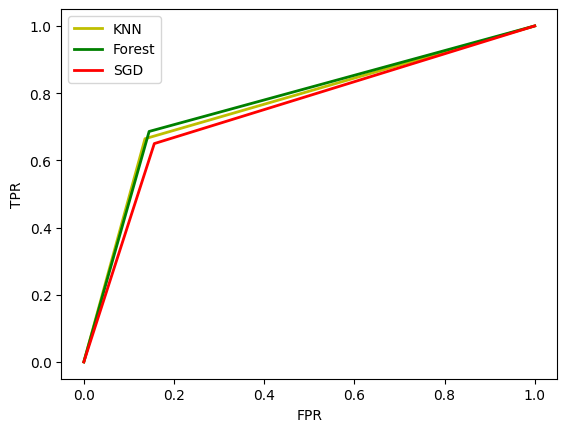

In [100]:
plt.plot(fpr_knn, tpr_knn, "y", linewidth = 2, label = "KNN")
plt.plot(fpr, tpr, "g", linewidth = 2, label = "Forest")
plt.plot(fpr_sgd, tpr_sgd, "r",  linewidth = 2, label = "SGD")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="best")

In [101]:
precision_score(titanic_labels, y_pred_knn)

0.757201646090535

In [102]:
recall_score(titanic_labels, y_pred_knn)

0.6642599277978339

In [103]:
cv_score_knn = cross_val_score(knn_clf, titanic_f, titanic_labels, cv = 5, scoring = "accuracy")

In [104]:
cv_score_knn.mean()

np.float64(0.7865950950457993)

**We need a better recall score because we want more people to get classified correctly so choosing Forest Model**

# Full pipeline

In [105]:
from sklearn.pipeline import Pipeline


In [106]:
cat_pipeline = Pipeline(
    [
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(drop = "first"))
    ]
)

In [111]:
cat_attribs = ["Sex","Embarked"]

### Creating a Custom Transformer

In [107]:
from sklearn.base import BaseEstimator, TransformerMixin

In [112]:
num_attribs = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

In [113]:
Pclass_ix, Age_ix, SibSp_ix, Parch_ix, Fare_ix = 0,1,2,3,4

In [114]:
import numpy as np

In [128]:
class AttribAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_fare = False):
        self.add_fare = add_fare

    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        relatives_count = X[:,SibSp_ix] + X[:, Parch_ix]
        fare = X[:, Fare_ix]
        X = np.delete(X, [SibSp_ix, Parch_ix, Fare_ix],axis = 1)
        if self.add_fare:
            return np.c_[X, relatives_count, fare]
        
        else:
            return np.c_[X, relatives_count]


In [129]:
df_num = data[num_attribs]

In [130]:
df_num

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [131]:
df_num.values

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,     nan,  1.    ,  2.    , 23.45  ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ]], shape=(891, 5))

In [135]:
attribs_add = AttribAdder(add_fare = True)

In [136]:
df_num_tr = attribs_add.transform(df_num.values)

In [137]:
df_num_tr

array([[ 3.    , 22.    ,  1.    ,  7.25  ],
       [ 1.    , 38.    ,  1.    , 71.2833],
       [ 3.    , 26.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,     nan,  3.    , 23.45  ],
       [ 1.    , 26.    ,  0.    , 30.    ],
       [ 3.    , 32.    ,  0.    ,  7.75  ]], shape=(891, 4))

In [138]:
num_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy = "median")),
        ("attribs_adder", AttribAdder(add_fare=True)),
        ("scaler", StandardScaler())
    ]
)

In [139]:
from sklearn.compose import ColumnTransformer

In [143]:
titanic_new = strat_train_set.drop("Survived", axis = 1)

In [144]:
titanic_new.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [146]:
num_attribs = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Sex","Embarked"]

In [147]:
full_pipeline = ColumnTransformer(
    [
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)
    ]
)

In [148]:
titanic_transformed = full_pipeline.fit_transform(titanic_new)

In [149]:
reg_cv_score = cross_val_score(reg, titanic_transformed, titanic_labels, cv = 5, scoring = "accuracy")

In [151]:
reg_cv_score.mean()

np.float64(0.7865261499064315)

In [154]:
reg.fit(titanic_transformed, titanic_labels)

RandomForestClassifier()

# Testing on test data

In [152]:
test_df = strat_test_set.drop("Survived", axis = 1)

In [153]:
test_labels = strat_test_set["Survived"].copy()

In [155]:
test_transformed = full_pipeline.transform(test_df)

In [156]:
test_transformed

array([[-0.38559571, -0.79214163, -0.56849607, ...,  1.        ,
         0.        ,  1.        ],
       [-1.57926589, -0.86797248,  0.04947218, ...,  0.        ,
         0.        ,  0.        ],
       [-0.38559571,  1.25529132, -0.56849607, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-1.57926589, -0.10966398, -0.56849607, ...,  1.        ,
         0.        ,  1.        ],
       [-0.38559571,  0.04199772,  1.28540868, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.80807448, -0.10966398, -0.56849607, ...,  0.        ,
         0.        ,  1.        ]], shape=(179, 7))

In [157]:
test_pred = reg.predict(test_transformed)

In [158]:
precision_score(test_labels, test_pred)

0.7323943661971831

In [159]:
recall_score(test_labels, test_pred)

0.8

# Making submission to Kaggle

In [160]:
kaggle_test = pd.read_csv(r"data\test.csv")

In [161]:
kaggle_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [162]:
kaggle_transformed = full_pipeline.transform(kaggle_test)

In [169]:
predictions = reg.predict(kaggle_transformed)

In [170]:
predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [173]:
submission = pd.DataFrame(kaggle_test["PassengerId"])

In [174]:
submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [175]:
submission["Survived"] = predictions

In [176]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [178]:
submission.to_csv("submission.csv", index= None)